In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('https://github.com/erkansirin78/datasets/raw/master/housing.csv')
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

<AxesSubplot: >

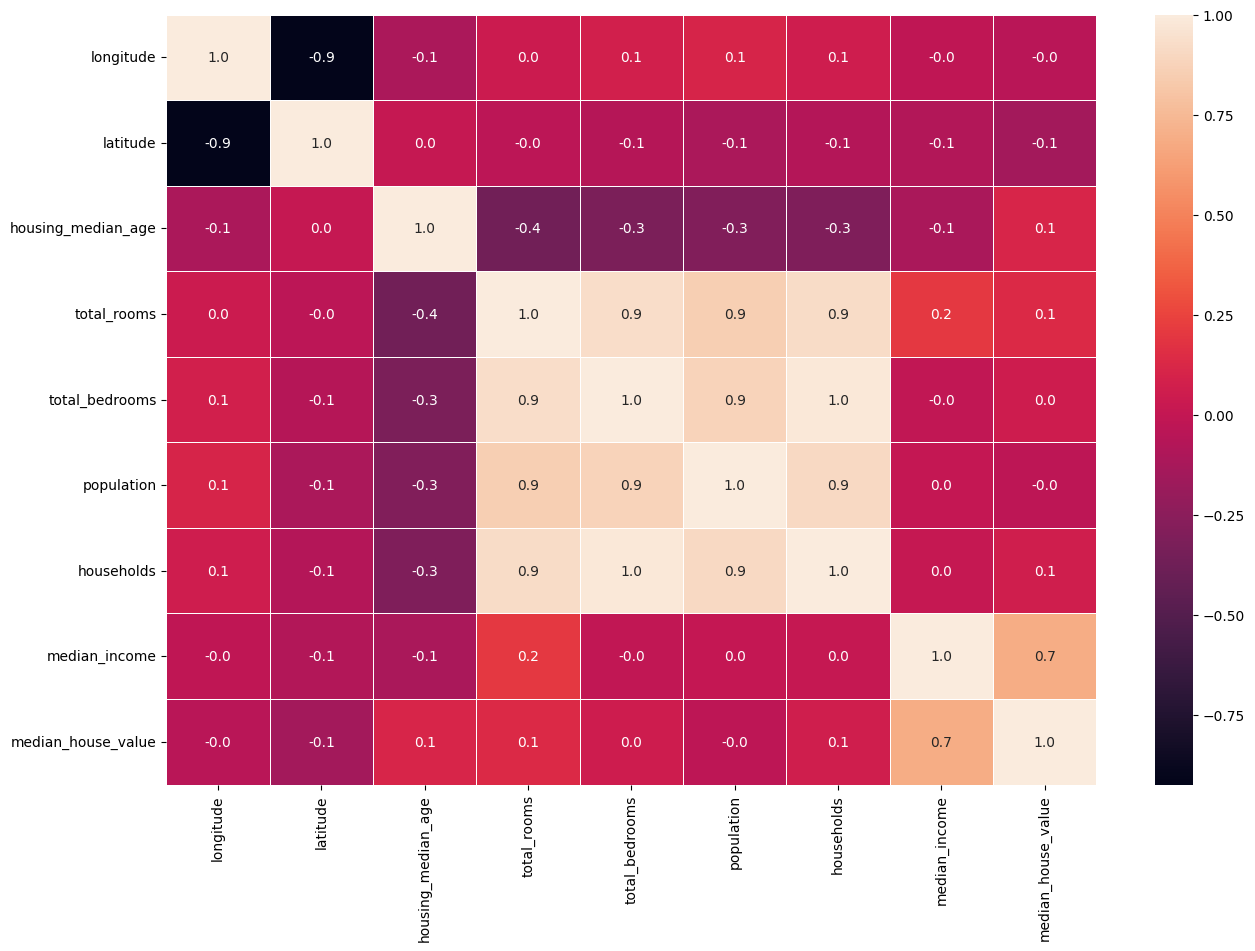

In [2]:
f,ax = plt.subplots(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [3]:
# Paired relations

df2 = df[['housing_median_age', 'total_rooms',
          'total_bedrooms', 'population', 'households', 'median_income',
          'median_house_value']]

fig = px.scatter_matrix(df2,
                        dimensions=['housing_median_age', 'total_rooms',
                                    'total_bedrooms', 'population', 'households', 'median_income',
                                    'median_house_value'])

fig.update_traces(marker=dict(size=1, line=dict(width=1, color="DarkSlateGrey")))
fig.update_traces(diagonal_visible=False)

fig.update_layout(
    width=1200,
    height=1200
)

fig.show()


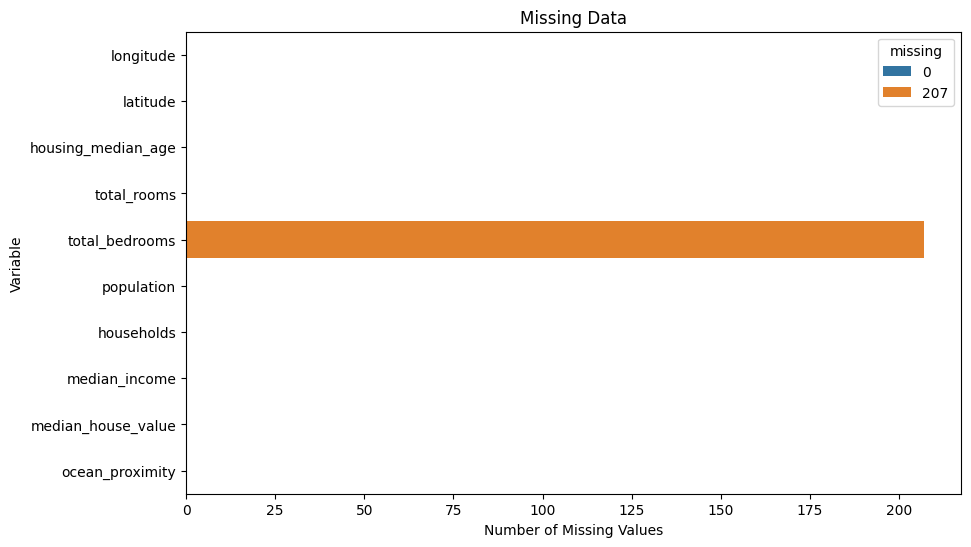

In [4]:
# Calculate missing values for each variable
missing_data = df.isna().sum()
# Create a DataFrame for missing values
missing_df = pd.DataFrame({'variable': missing_data.index,
                           'missing': missing_data.values})
# Plot missing data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_df,
            y='variable',
            x='missing',
            hue='missing',
            dodge=False)
plt.xlabel('Number of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data')
plt.show()
# We will handle to outlier data by PyCaret

## Geographical Visualization

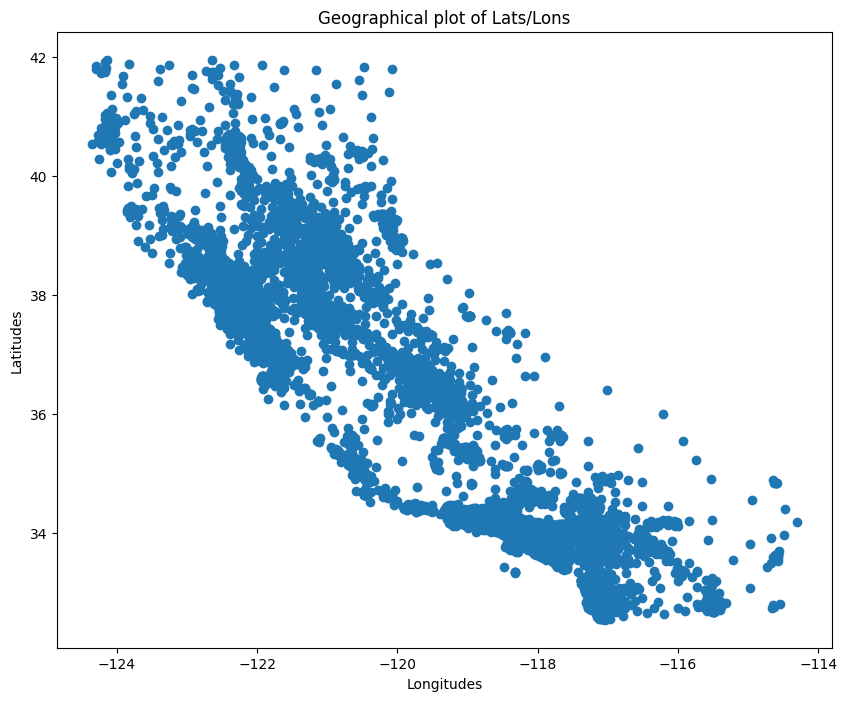

In [5]:
plt.figure(figsize=(10,8))
plt.scatter('longitude','latitude',data=df)
plt.ylabel('Latitudes')
plt.xlabel('Longitudes')
plt.title('Geographical plot of Lats/Lons')
plt.show()

* With a good understanding of California's map, it becomes evident that the areas with high population density, such as the Bay Area, Los Angeles, and San Diego, are easily identifiable.
* Our brains have a natural ability to visually recognize patterns, but it is essential to manipulate visualizations to emphasize these patterns effectively.

In [6]:
import plotly.express as px

fig = px.scatter(df, x="longitude", y="latitude", size=df["population"]/100,
                 color="median_house_value", color_continuous_scale="Jet")
fig.update_layout(
    title="Scatter Plot of Population and Median House Value",
    xaxis_title="Longitude",
    yaxis_title="Latitude",
    showlegend=True,
    legend_title="Population",
    width=900,
    height=500
)
fig.show()


In [10]:
import patsy
import folium as folium
from folium import plugins
from folium.plugins import HeatMap
california_map = folium.Map(location=[36.7783,-119.4179], zoom_start = 6, min_zoom=5)
df_map = df[['latitude', 'longitude']]
data = [[row['latitude'],row['longitude']] for index, row in df_map.iterrows()]
_ = HeatMap(data, radius=10).add_to(california_map)
california_map
# Code source :  Kaggle

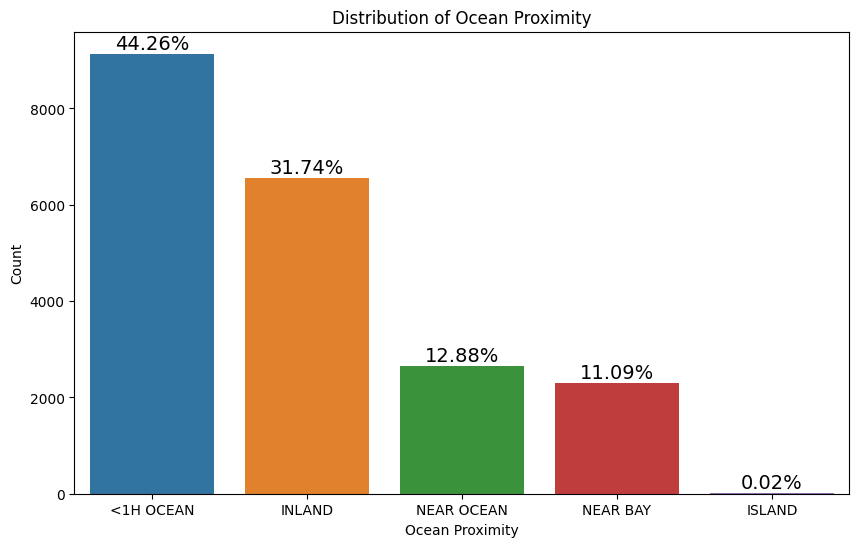

In [8]:
# Explore the column ocean_proximity
ocean_values = df["ocean_proximity"].value_counts()

# Plot the count of ocean_proximity values
plt.figure(figsize=(10,6))
sns.countplot(x="ocean_proximity", data=df, order=ocean_values.index)

# Display the percentage above each bar
total_count = df.shape[0]
for i, count in enumerate(ocean_values):
    percentage = count / total_count * 100
    strt = '{:.2f}%'.format(percentage)
    plt.text(i, count+100, strt, ha='center', color='black', fontsize=14)

# Set labels and title
plt.xlabel('Ocean Proximity')
plt.ylabel('Count')
plt.title('Distribution of Ocean Proximity')
plt.show()

In [9]:
numerics = [
                'longitude',
                'latitude',
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
            ]

categorics = [
    
'ocean_proximity'
    
             ] 
target = ['median_house_value']

desired_list = []
for i in numerics:
    desired_list.append(i)
for i in categorics:
    desired_list.append(i)
for i in target:
    desired_list.append(i)    



In [19]:
# MLFlow Enviroments
import os
# I believe that using the .env file may not be the best choice because PyCaret automatically retrieves the keys and values from it. 
# In my opinion, a more controlled approach would be preferable.

os.environ['MLFLOW_TRACKING_URI'] = 'http://localhost:5000/'
os.environ['MLFLOW_S3_ENDPOINT_URL'] = 'http://localhost:9000/'
os.environ['MLFLOW_TRACKING_USERNAME'] = 'UsrName'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'Password'
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"
# set mlflow tracking uri
import mlflow
mlflow.set_tracking_uri("http://localhost:5000/")

In [11]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.15, random_state=42, shuffle=True)
from pycaret.regression import *
s = setup(data = train,
          target='median_house_value',
          train_size=0.85,
          test_data=test,
          categorical_features = categorics,
          numeric_features=numerics,
          preprocess=True,          
          session_id = 42,
          # LOGGING KEYS
          log_experiment = True,
          log_data=True,
          # log_profile=True, # wasting time
          log_plots=True,
          system_log = True,
          experiment_name='MLFlow_by_PyCaret', # PyCaret will generate it if it is not present.
          
)

2023/05/20 01:56:30 INFO mlflow.tracking.fluent: Experiment with name 'MLFLOW_by_PyCaret' does not exist. Creating a new experiment.


In [12]:
models_compared = compare_models(
                                 
                                 )

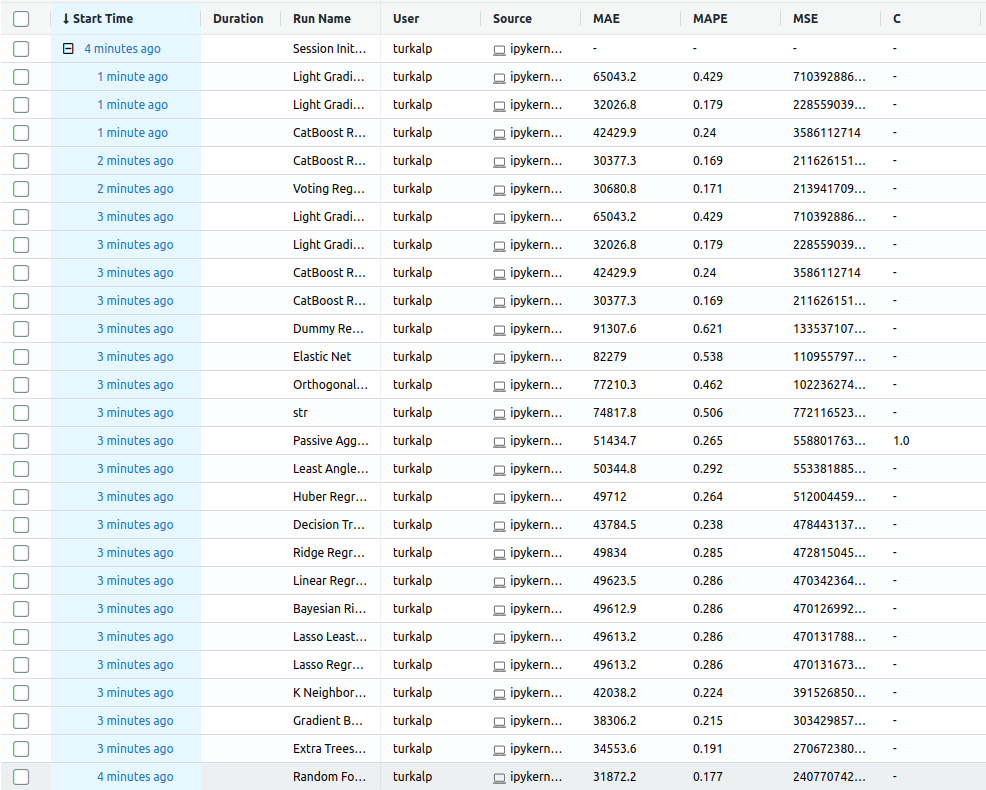

In [13]:
cb = create_model(
                     estimator='catboost',

                    )
prediction = predict_model(cb,test)

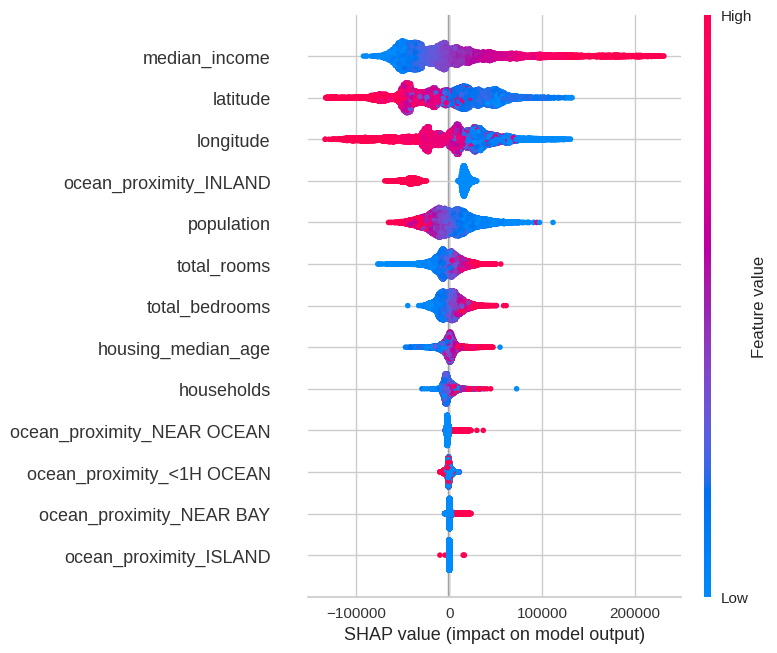

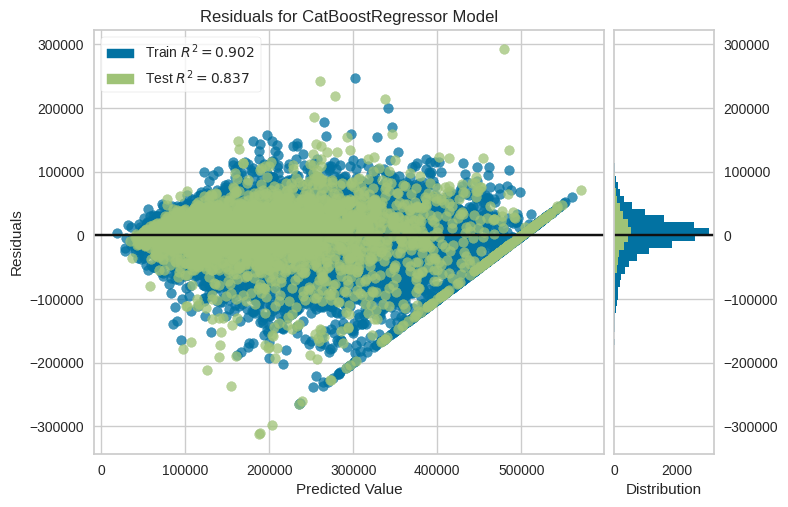

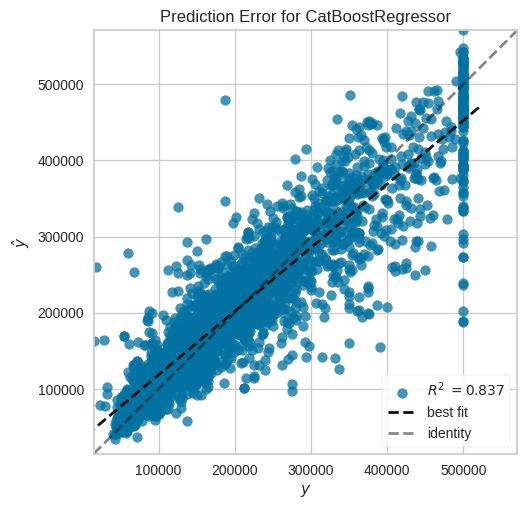

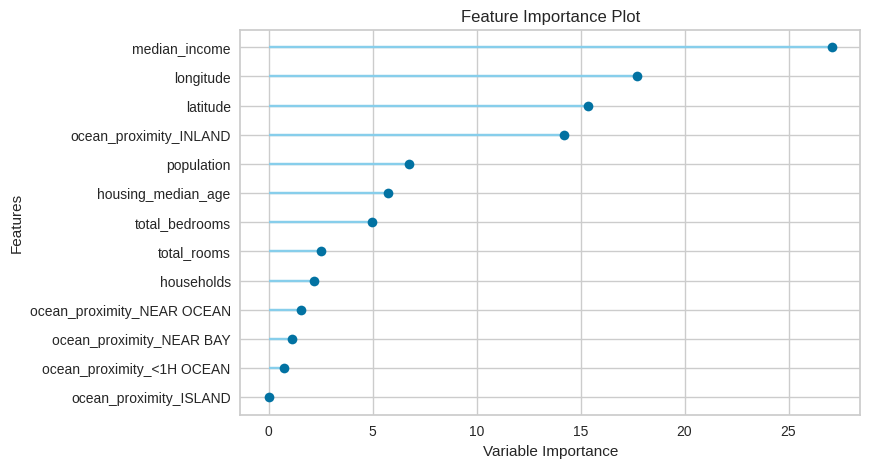

In [14]:
interpret_model(cb,use_train_data=True)
plot_model(cb, plot = 'residuals')
plot_model(cb, plot = 'error')
plot_model(cb, plot = 'feature_all')

### All of this logged at ML-Flow (your active related DataBase)

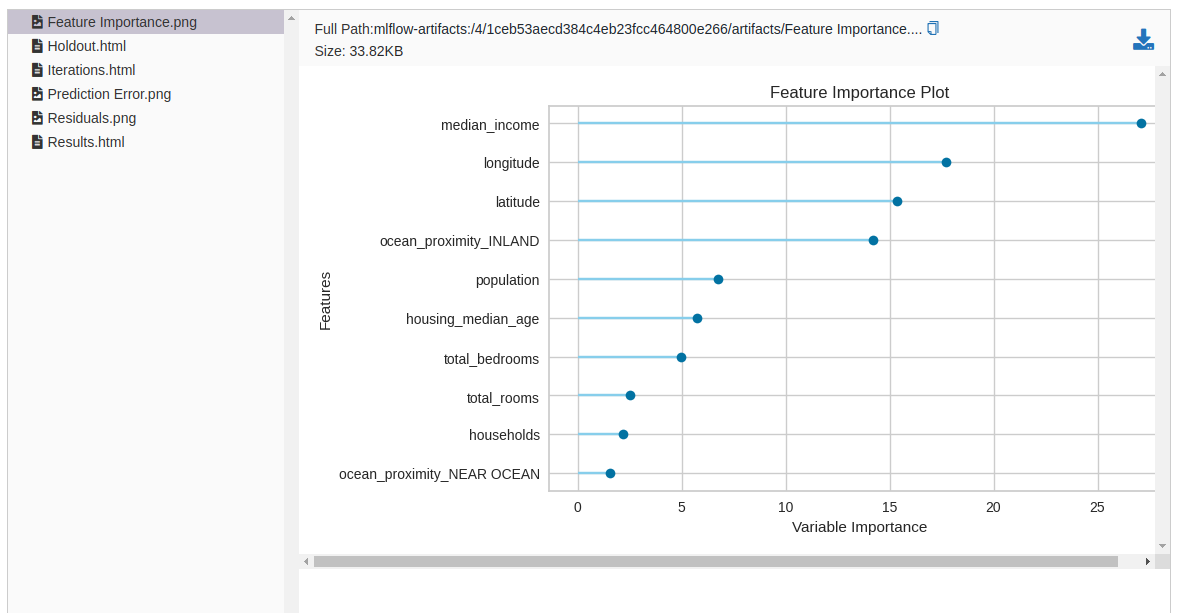


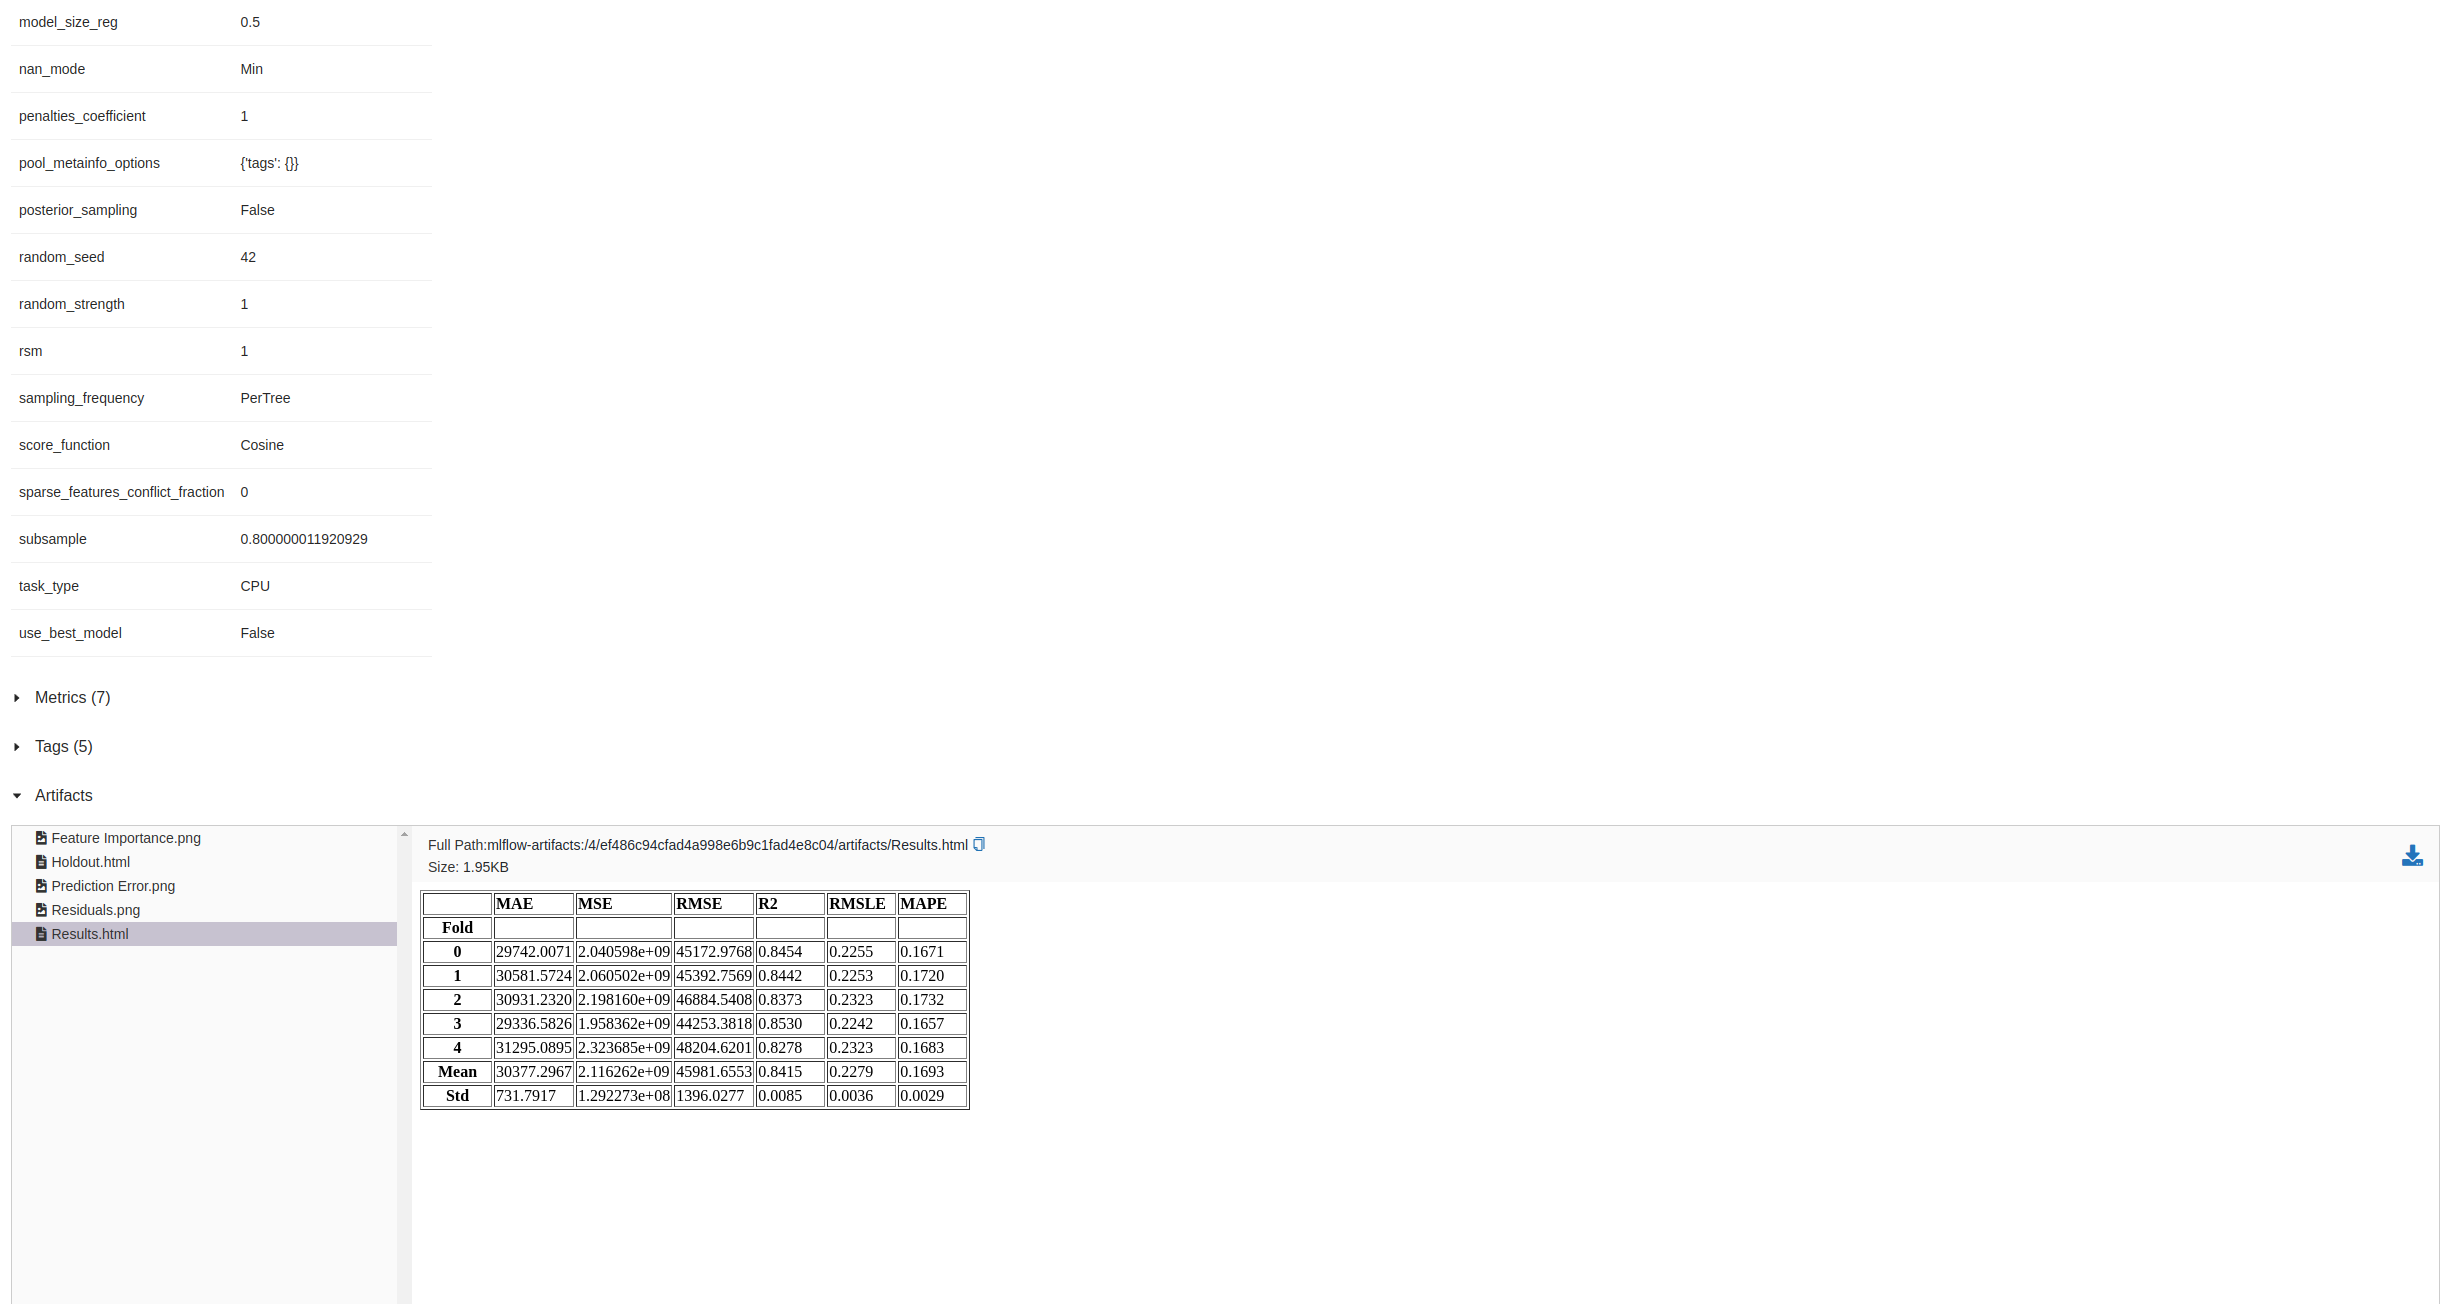

In [15]:
tuned_model_cb = tune_model(
                            estimator=cb,
                            
                           )
predict_model(tuned_model_cb,test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
20046 -119.010002  36.060001                25.0       1505.0             NaN   
3024  -119.459999  35.139999                30.0       2943.0             NaN   
15663 -122.440002  37.799999                52.0       3830.0             NaN   
20484 -118.720001  34.279999                17.0       3051.0             NaN   
9814  -121.930000  36.619999                34.0       2351.0             NaN   
...           ...        ...                 ...          ...             ...   
19053 -121.690002  38.160000                33.0       1808.0           363.0   
9444  -119.820000  37.570000                13.0       1713.0           340.0   
20266 -119.180000  34.209999                46.0       2062.0           484.0   
13522 -117.410004  34.230000                17.0        889.0           131.0   
6114  -117.900002  34.130001                37.0       1801.0           422.0   

       population  households  median_income ocean_proximity         y  \
20046      1392.0       359.0         1.6812          INLAND   47700.0   
3024       1565.0       584.0         2.5313          INLAND   45800.0   
15663      1310.0       963.0         3.4801        NEAR BAY  500001.0   
20484      1705.0       495.0         5.7376       <1H OCEAN  218600.0   
9814       1063.0       428.0         3.7250      NEAR OCEAN  278000.0   
...           ...         ...            ...             ...       ...   
19053       824.0       340.0         3.2937          INLAND   96400.0   
9444        643.0       241.0         2.6620          INLAND   92400.0   
20266      1522.0       469.0         3.0870      NEAR OCEAN  213900.0   
13522       439.0       141.0         6.1426          INLAND  155000.0   
6114       1564.0       425.0         3.1597       <1H OCEAN  133000.0   

       prediction_label  
20046      51943.540938  
3024       76551.151097  
15663     460211.932222  
20484     254876.803020  
9814      294839.405322  
...                 ...  
19053     136935.018356  
9444      115198.872380  
20266     184979.258215  
13522     189703.392819  
6114      157653.407986  

[3096 rows x 11 columns]

In [16]:
lgb = create_model(
                     estimator='lightgbm',
                     
                    )
predict_model(lgb,test)

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
20046 -119.010002  36.060001                25.0       1505.0             NaN   
3024  -119.459999  35.139999                30.0       2943.0             NaN   
15663 -122.440002  37.799999                52.0       3830.0             NaN   
20484 -118.720001  34.279999                17.0       3051.0             NaN   
9814  -121.930000  36.619999                34.0       2351.0             NaN   
...           ...        ...                 ...          ...             ...   
19053 -121.690002  38.160000                33.0       1808.0           363.0   
9444  -119.820000  37.570000                13.0       1713.0           340.0   
20266 -119.180000  34.209999                46.0       2062.0           484.0   
13522 -117.410004  34.230000                17.0        889.0           131.0   
6114  -117.900002  34.130001                37.0       1801.0           422.0   

       population  households  median_income ocean_proximity         y  \
20046      1392.0       359.0         1.6812          INLAND   47700.0   
3024       1565.0       584.0         2.5313          INLAND   45800.0   
15663      1310.0       963.0         3.4801        NEAR BAY  500001.0   
20484      1705.0       495.0         5.7376       <1H OCEAN  218600.0   
9814       1063.0       428.0         3.7250      NEAR OCEAN  278000.0   
...           ...         ...            ...             ...       ...   
19053       824.0       340.0         3.2937          INLAND   96400.0   
9444        643.0       241.0         2.6620          INLAND   92400.0   
20266      1522.0       469.0         3.0870      NEAR OCEAN  213900.0   
13522       439.0       141.0         6.1426          INLAND  155000.0   
6114       1564.0       425.0         3.1597       <1H OCEAN  133000.0   

       prediction_label  
20046      61095.414485  
3024       74057.271712  
15663     439772.519860  
20484     247754.682723  
9814      334430.060531  
...                 ...  
19053     133477.769085  
9444      118146.320975  
20266     187665.277153  
13522     201399.332902  
6114      171418.320691  

[3096 rows x 11 columns]

In [17]:
tuned_model_lgb = tune_model(
                            estimator=lgb,
                           
                           )
predict_model(tuned_model_lgb,test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
20046 -119.010002  36.060001                25.0       1505.0             NaN   
3024  -119.459999  35.139999                30.0       2943.0             NaN   
15663 -122.440002  37.799999                52.0       3830.0             NaN   
20484 -118.720001  34.279999                17.0       3051.0             NaN   
9814  -121.930000  36.619999                34.0       2351.0             NaN   
...           ...        ...                 ...          ...             ...   
19053 -121.690002  38.160000                33.0       1808.0           363.0   
9444  -119.820000  37.570000                13.0       1713.0           340.0   
20266 -119.180000  34.209999                46.0       2062.0           484.0   
13522 -117.410004  34.230000                17.0        889.0           131.0   
6114  -117.900002  34.130001                37.0       1801.0           422.0   

       population  households  median_income ocean_proximity         y  \
20046      1392.0       359.0         1.6812          INLAND   47700.0   
3024       1565.0       584.0         2.5313          INLAND   45800.0   
15663      1310.0       963.0         3.4801        NEAR BAY  500001.0   
20484      1705.0       495.0         5.7376       <1H OCEAN  218600.0   
9814       1063.0       428.0         3.7250      NEAR OCEAN  278000.0   
...           ...         ...            ...             ...       ...   
19053       824.0       340.0         3.2937          INLAND   96400.0   
9444        643.0       241.0         2.6620          INLAND   92400.0   
20266      1522.0       469.0         3.0870      NEAR OCEAN  213900.0   
13522       439.0       141.0         6.1426          INLAND  155000.0   
6114       1564.0       425.0         3.1597       <1H OCEAN  133000.0   

       prediction_label  
20046      61095.414485  
3024       74057.271712  
15663     439772.519860  
20484     247754.682723  
9814      334430.060531  
...                 ...  
19053     133477.769085  
9444      118146.320975  
20266     187665.277153  
13522     201399.332902  
6114      171418.320691  

[3096 rows x 11 columns]

In [19]:
blender = blend_models([tuned_model_cb,tuned_model_lgb,])
predict_model(blender,test)

Initiated  . . . . . . . . . . . . . . . . . .              01:59:02
Status     . . . . . . . . . . . . . . . . . .  Loading Dependencies
Estimator  . . . . . . . . . . . . . . . . . .     Compiling Library

longitude   latitude  housing_median_age  total_rooms  total_bedrooms  \
20046 -119.010002  36.060001                25.0       1505.0             NaN   
3024  -119.459999  35.139999                30.0       2943.0             NaN   
15663 -122.440002  37.799999                52.0       3830.0             NaN   
20484 -118.720001  34.279999                17.0       3051.0             NaN   
9814  -121.930000  36.619999                34.0       2351.0             NaN   
...           ...        ...                 ...          ...             ...   
19053 -121.690002  38.160000                33.0       1808.0           363.0   
9444  -119.820000  37.570000                13.0       1713.0           340.0   
20266 -119.180000  34.209999                46.0       2062.0           484.0   
13522 -117.410004  34.230000                17.0        889.0           131.0   
6114  -117.900002  34.130001                37.0       1801.0           422.0   

       population  households  median_income ocean_proximity         y  \
20046      1392.0       359.0         1.6812          INLAND   47700.0   
3024       1565.0       584.0         2.5313          INLAND   45800.0   
15663      1310.0       963.0         3.4801        NEAR BAY  500001.0   
20484      1705.0       495.0         5.7376       <1H OCEAN  218600.0   
9814       1063.0       428.0         3.7250      NEAR OCEAN  278000.0   
...           ...         ...            ...             ...       ...   
19053       824.0       340.0         3.2937          INLAND   96400.0   
9444        643.0       241.0         2.6620          INLAND   92400.0   
20266      1522.0       469.0         3.0870      NEAR OCEAN  213900.0   
13522       439.0       141.0         6.1426          INLAND  155000.0   
6114       1564.0       425.0         3.1597       <1H OCEAN  133000.0   

       prediction_label  
20046      56519.477711  
3024       75304.211404  
15663     449992.226041  
20484     251315.742872  
9814      314634.732927  
...                 ...  
19053     135206.393720  
9444      116672.596677  
20266     186322.267684  
13522     195551.362861  
6114      164535.864338  

[3096 rows x 11 columns]

PyCaret automatically logs the performance metrics, hyperparameters, and other details of all models once they are directed to MLFlow. However, if you want to save the model itself, there is a different approach. In this approach, we first finalize the PyCaret model and then complete the process using the log_model function. In the template code, sklearn is used as an example, but there are also specific functions available for some ML libraries (such as PyTorch or FastAI). I don't know if PyCaret will have a specific function like this in the future. One challenge I haven't overcome yet is saving the models as versions. However, it is possible to load only one version of the models and use separate names for each. But I personally find it more elegant to save a trial process as versions of a model. When you enter the models, it already indicates which algorithm was used.

In [63]:
# Model Registry 
def finalize_and_save_models(models, model_names, exp_name):
    for model, model_name in zip(models, model_names):
        final_model = finalize_model(model)
        save_model(final_model, model_name)
        mlflow.sklearn.log_model(final_model,
                                 registered_model_name=exp_name,
                                 artifact_path=model_name)

# Define the models and their names
models = [blender, tuned_model_cb, tuned_model_lgb]  # Include more models as required
model_names = ['BlenderModel', 'TunedCB', 'TunedLGB']  # Include more model names as required

finalize_and_save_models(models, model_names, exp_name='MLFlow_by_PyCaret')

Transformation Pipeline and Model Successfully Saved


Successfully registered model 'MLFlow_by_PyCaret'.
2023/05/20 02:29:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: MLFlow_by_PyCaret, version 1
Created version '1' of model 'MLFlow_by_PyCaret'.


Transformation Pipeline and Model Successfully Saved


Registered model 'MLFlow_by_PyCaret' already exists. Creating a new version of this model...
2023/05/20 02:29:17 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: MLFlow_by_PyCaret, version 2
Created version '2' of model 'MLFlow_by_PyCaret'.


Transformation Pipeline and Model Successfully Saved


Registered model 'MLFlow_by_PyCaret' already exists. Creating a new version of this model...
2023/05/20 02:29:24 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: MLFlow_by_PyCaret, version 3
Created version '3' of model 'MLFlow_by_PyCaret'.


### Registered models

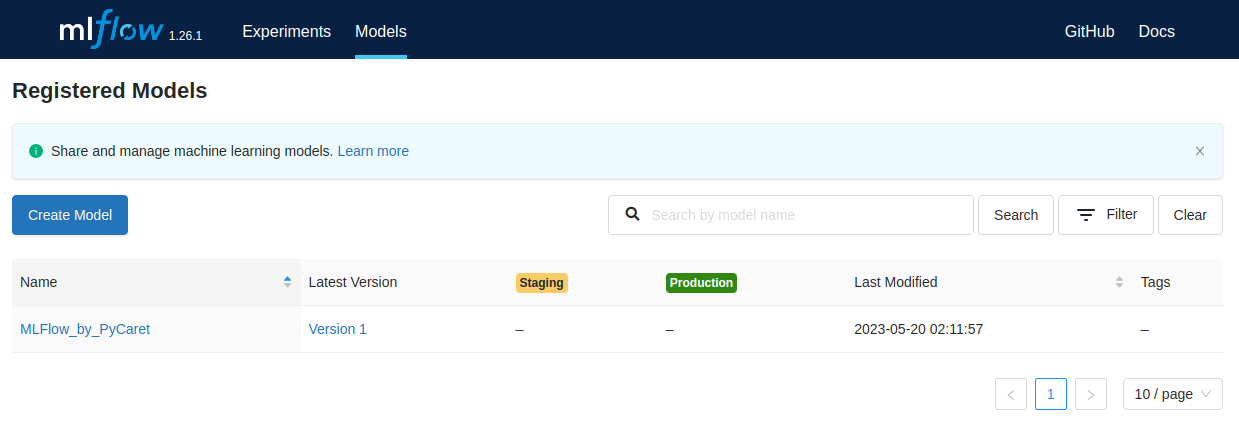

### Model Groups

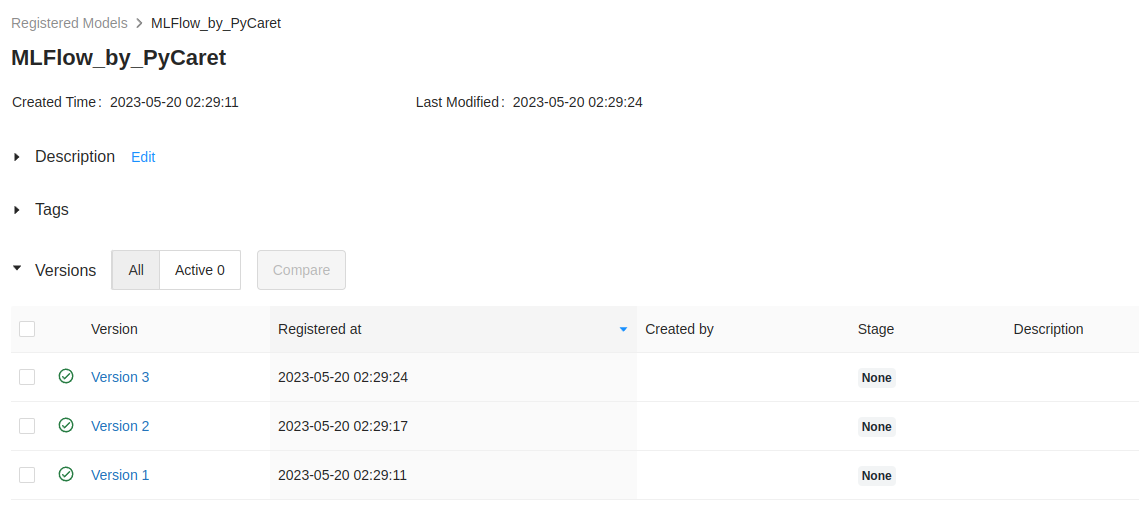

In [ ]:
# Use for latest model: 
import re, json

client = mlflow.tracking.MlflowClient()

def parse_model_version(data_string):
    pattern = r"(\w+)\s*=\s*([^\s,]+)"
    matches = re.findall(pattern, data_string)
    model_version_dict = {key: value for key, value in matches}
    return model_version_dict


for data_string in client.list_registered_models():
    data_string = str(data_string)
    model_version_dict = parse_model_version(data_string)
    json_output = json.dumps(model_version_dict, indent=4)
    print(json_output)

* Later on, I called a different function to delete the model. 
* Here, you can view all the models, create a list, and iteratively delete them.

In [67]:
def delete_mlflow_model(model_name):

# List registered models
    registered_models = client.list_registered_models()

    # Check model name
    for registered_model in registered_models:
        if registered_model.name == model_name:
            # Delete the model
            client.delete_registered_model(registered_model.name)
            print(f"Model '{model_name}' has been successfully deleted.")
            return

    # Show error message if model is not found
    print(f"Model '{model_name}' not found.")

for model_name in ['MLFlow_by_PyCaret']:
    delete_mlflow_model(model_name)

Model 'MLFlow_by_PyCaret' has been successfully deleted.


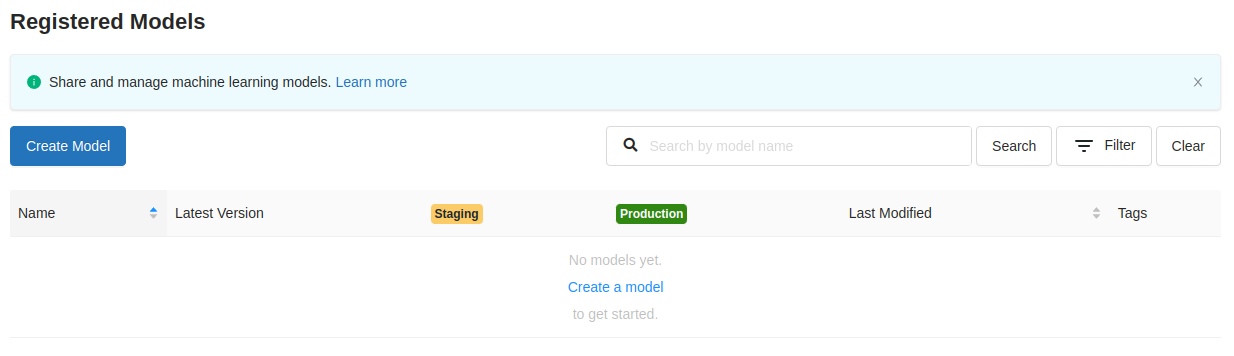